In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('SaaS-Sales.csv')

# Latar Belakang
SaaS (Software as a Service) adalah salah satu jenis model layanan cloud computing di mana software sudah siap digunakan tanpa harus melakukan konfigurasi atau instalasi apa pun. Dataset SaaS-Sales yang tersedia mencerminkan penjualan dari sebuah perusahaan SaaS yang mencakup berbagai segmen pasar, produk, dan wilayah geografis. Data ini mencakup informasi penting seperti tanggal pesanan, negara, kota, industri, jenis produk, jumlah penjualan, diskon yang diberikan, dan profit yang dihasilkan.


Dalam persaingan bisnis SaaS (Software as a Service), perusahaan sering mengandalkan strategi diskon untuk menarik pelanggan dan meningkatkan penjualan di berbagai segmen pasar. Pada dasarnya, diskon merupakan salah satu cara untuk mempercepat pengambilan keputusan konsumen dalam membeli produk atau jasa yang ditawarkan. Dengan memberikan diskon, perusahaan dapat menawarkan harga yang lebih murah dibandingkan dengan harga normalnya. Hal ini dapat meningkatkan daya tarik produk atau jasa yang ditawarkan dan membuat konsumen lebih tertarik untuk membeli. Namun, meskipun diskon dapat meningkatkan volume penjualan, diskon juga menimbulkan risiko signifikan terhadap profitabilitas jika tidak dikelola dengan hati-hati.


Link Dataset dapat diakses [disini](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU?usp=sharing)

Source: [revou](https://revou.co/kosakata/saas), [ilmu keuangan](https://www.ilmukeuangan.com/post/diskon-efektif-omzet-dan-laba-meningkat)

## Permasalahan

Perusahaan ingin mengetahui **bagaimana pengaruh diskon terhadap profitabilitas penjualan di berbagai segmen pasar dan produk? Apakah terdapat segmen pasar atau produk tertentu di mana diskon secara signifikan mempengaruhi profitabilitas?**

Dari rumusan ini, kita bisa fokus pada beberapa sub-pertanyaan berikut:

- Apakah ada segmen pasar tertentu di mana diskon lebih berpengaruh terhadap penurunan profit?
- Bagaimana pengaruh diskon terhadap profitabilitas di berbagai kategori produk?
- Apakah ada tingkat diskon tertentu yang masih dapat diterima tanpa mengorbankan profit secara signifikan?
- Apa saja faktor lain selain diskon yang mempengaruhi profitabilitas, dan bagaimana mereka berinteraksi dengan diskon?

#Data Understanding


Berikut merupakan 10 data teratas yang terdapat dalam data set.

In [4]:
df.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


##Penjelasan Setiap Variable (Data Dictionary)


Dataset SaaS-Sales terdiri dari 19 kolom yaitu:

|kolom | Penjelasan |
|---- | ---- |
| Row ID | Nomor unik yang mengidentifikasi setiap baris dalam dataset|
| Order ID | Nomor unik yang mengidentifikasi setiap pesanan yang dilakukan oleh pelanggan|
| Order Date | Tanggal ketika pesanan dilakukan|
| Date Key | Representasi numerik dari Order Date dalam format YYYYMMDD |
| Contact Name | Nama kontak utama di perusahaan pelanggan yang melakukan pesanan |
| Country | Negara asal pelanggan yang melakukan pesanan|
| City | Kota asal pelanggan |
| Region | Wilayah tempat pelanggan berada |
| Subregion | Sub-wilayah yang lebih spesifik dari Region|
| Customer | Nama perusahaan atau entitas yang membeli produk atau layanan |
| Customer ID | Nomor identifikasi unik untuk setiap pelanggan |
| Industry | Industri atau sektor ekonomi di mana pelanggan beroperasi|
| Segment | Segmen pasar tempat pelanggan berada |
| Product | Nama produk atau layanan yang dijual |
| License | Nomor lisensi unik yang terkait dengan produk SaaS yang dijual|
| Sales | Jumlah total pendapatan yang dihasilkan dari penjualan produk atau layanan dalam satu transaksi |
| Quantity | Jumlah unit produk yang terjual dalam satu transaksi |
| Discount | Persentase atau nilai diskon yang diberikan pada transaksi tersebut|
| Profit | Keuntungan yang dihasilkan dari transaksi |


Data set SaaS-Sales terdiri dari 9994 baris dan 19 kolom.

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

Order date masih memiliki format yang kurang tepat dimana seharusnya merupakan datetime

##Missing Value

In [ ]:
##Missing Value
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})

total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

<Axes: >

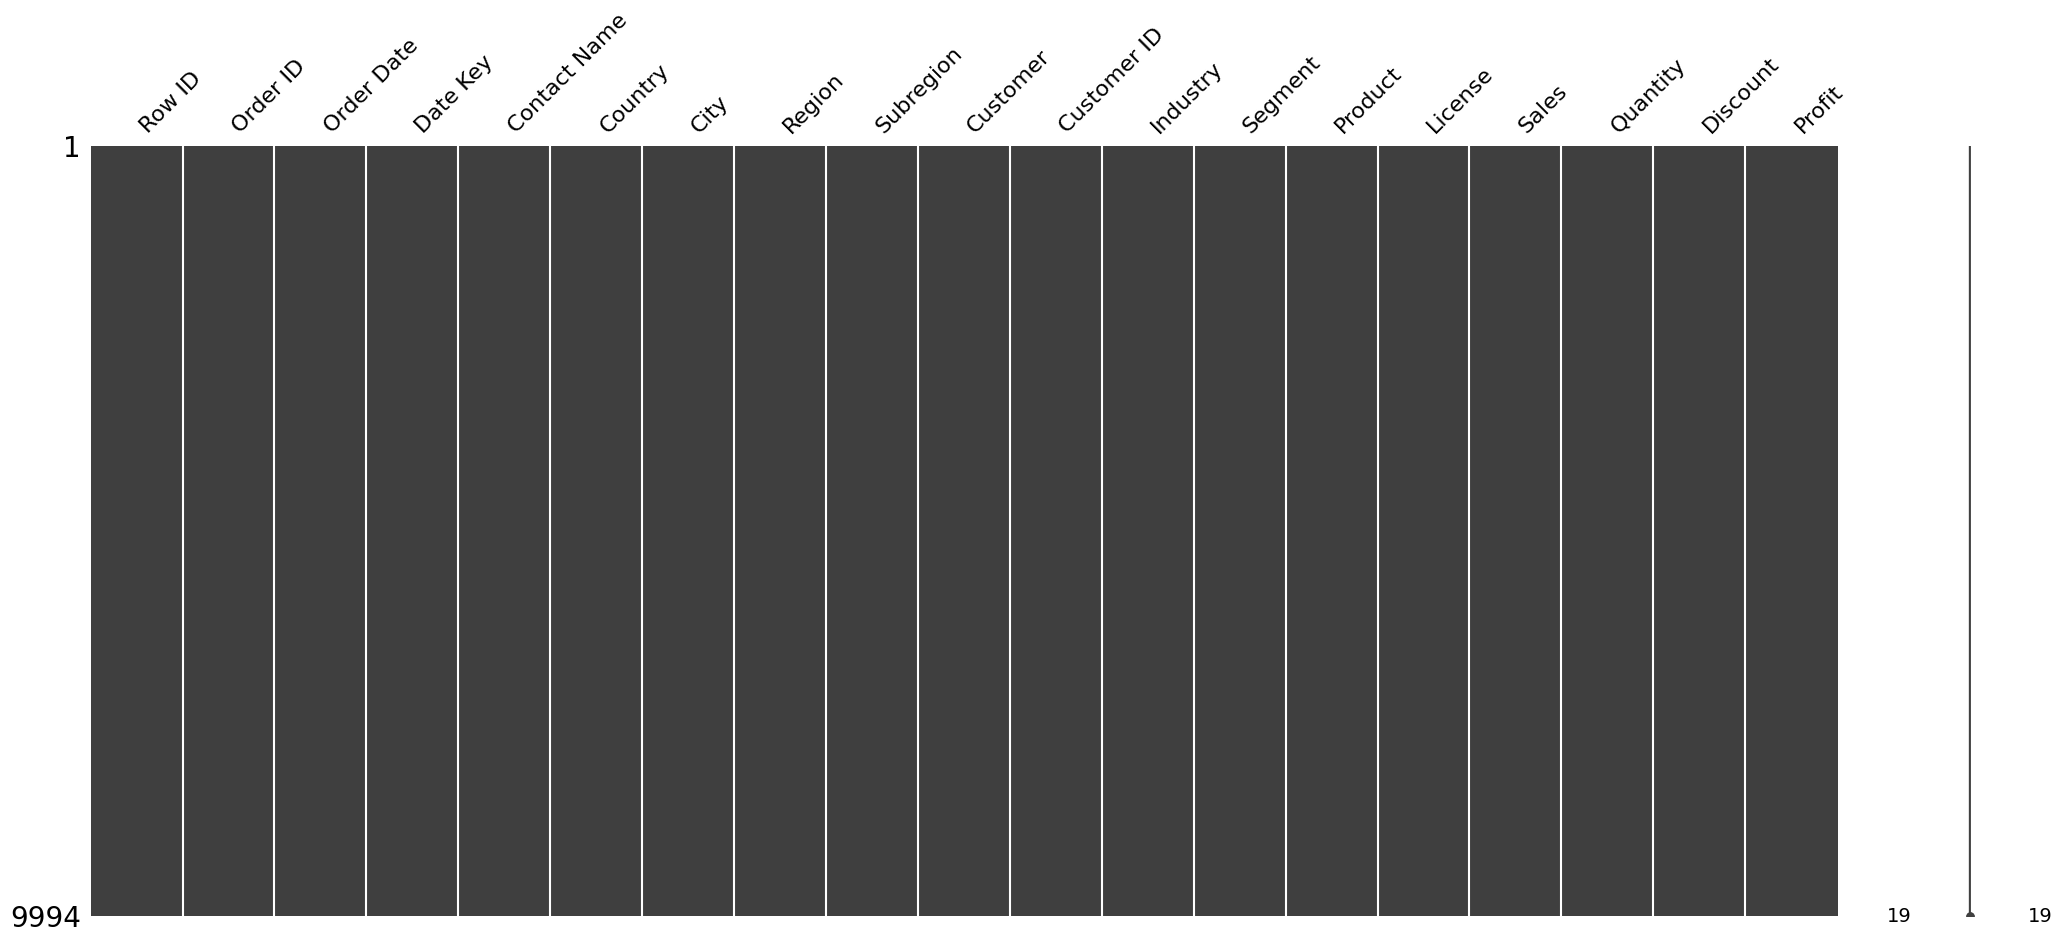

In [7]:
import missingno

# Hubungan antar missing values secara visualisasi
missingno.matrix(df)

Data set SaaS-Sales tidak memiliki value kosong atau missing value yang ditunjukkan melalui persentase missing value sebesar 0%.

##Data Duplikat

In [8]:
#Data Duplikat
df.duplicated().sum()

0

In [43]:
# untuk memunculkan data yang duplikat
df[df.duplicated()]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Tidak terdapat data duplikat pada data SaaS-Sales.

##Variable Numerik


###Statistika Deskriptif

In [9]:
# Statistika dekriptif
df.describe() # OTOMATIS hanya mengambil yang numerik

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4.997500e+03,2885.163629,1.000000e+00,2.499250e+03,4.997500e+03,7.495750e+03,9.994000e+03
Date Key,9994.0,2.021803e+07,11238.975964,2.020010e+07,2.021052e+07,2.022063e+07,2.023052e+07,2.023123e+07
Customer ID,9994.0,1.049772e+03,29.719388,1.001000e+03,1.024000e+03,1.049000e+03,1.076000e+03,1.101000e+03
Sales,9994.0,2.298580e+02,623.245101,4.440000e-01,1.728000e+01,5.449000e+01,2.099400e+02,2.263848e+04
Quantity,9994.0,3.789574e+00,2.225110,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.400000e+01
Discount,9994.0,1.562027e-01,0.206452,0.000000e+00,0.000000e+00,2.000000e-01,2.000000e-01,8.000000e-01
Profit,9994.0,2.865690e+01,234.260108,-6.599978e+03,1.728750e+00,8.666500e+00,2.936400e+01,8.399976e+03


Data menunjukkan adanya variasi yang cukup besar dalam penjualan, diskon, dan profit yang ditunjukkan melalui standar deviasi. Standar deviasi kuantitas adalah 2,23, menunjukkan bahwa kuantitas transaksi tidak terlalu bervariasi.

###Distribusi Data

####Grafik Histogram


In [11]:
# library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Profit', ylabel='Count'>

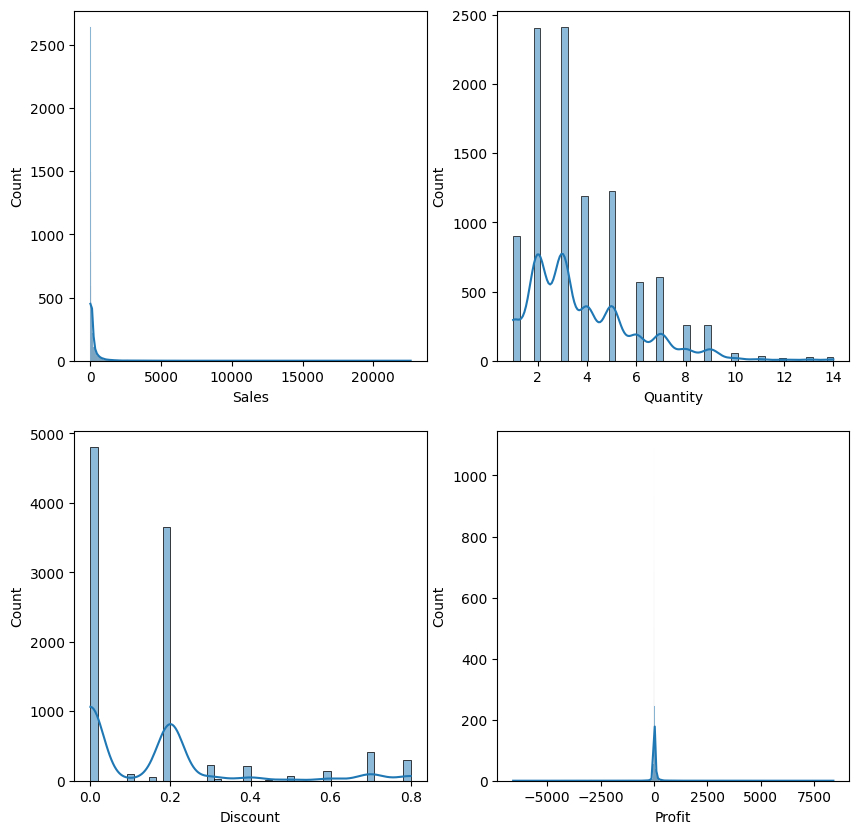

In [44]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

plt.subplot(2,2,1) # baris, kolom, posisi
sns.histplot(df['Sales'], kde = True)

plt.subplot(2,2,2) # baris, kolom, posisi
sns.histplot(df['Quantity'], kde = True)

plt.subplot(2,2,3) # baris, kolom, posisi
sns.histplot(df['Discount'], kde = True)

plt.subplot(2,2,4) # baris, kolom, posisi
sns.histplot(df['Profit'], kde = True)

Grafik histogram untuk sales, quantity, discount, dan profit menunjukkan hasil bahwa keempat variable tersebut tidak memiliki distribusi normal.

####Uji Statistika

In [13]:
!pip install scipy

In [14]:
# D'Agustino Pearson
from scipy.stats import normaltest

numerik = df.select_dtypes(include = 'number')

for column in numerik:
    stat, pval = normaltest(df[column])
    print(f'Kolom: {column}')
    if pval < 0.05:
        print('Data tidak normal')
    else:
        print('Data normal')
    print (f'Statistik : {stat}, p-val : {pval}\n ')

Kolom: Row ID
Data tidak normal
Statistik : 8692.698522581693, p-val : 0.0
 
Kolom: Date Key
Data tidak normal
Statistik : 41671.35562677241, p-val : 0.0
 
Kolom: Customer ID
Data tidak normal
Statistik : 14357.930602459772, p-val : 0.0
 
Kolom: Sales
Data tidak normal
Statistik : 18033.30849753588, p-val : 0.0
 
Kolom: Quantity
Data tidak normal
Statistik : 2148.0180216001404, p-val : 0.0
 
Kolom: Discount
Data tidak normal
Statistik : 2977.8221207355864, p-val : 0.0
 
Kolom: Profit
Data tidak normal
Statistik : 14363.736243749532, p-val : 0.0
 


Menurut uji statistika menggunakan normal test, didapatkan hasil bahwa semua kolom numerik memiliki data yang tidak normal.

###Outliers


####Boxplot

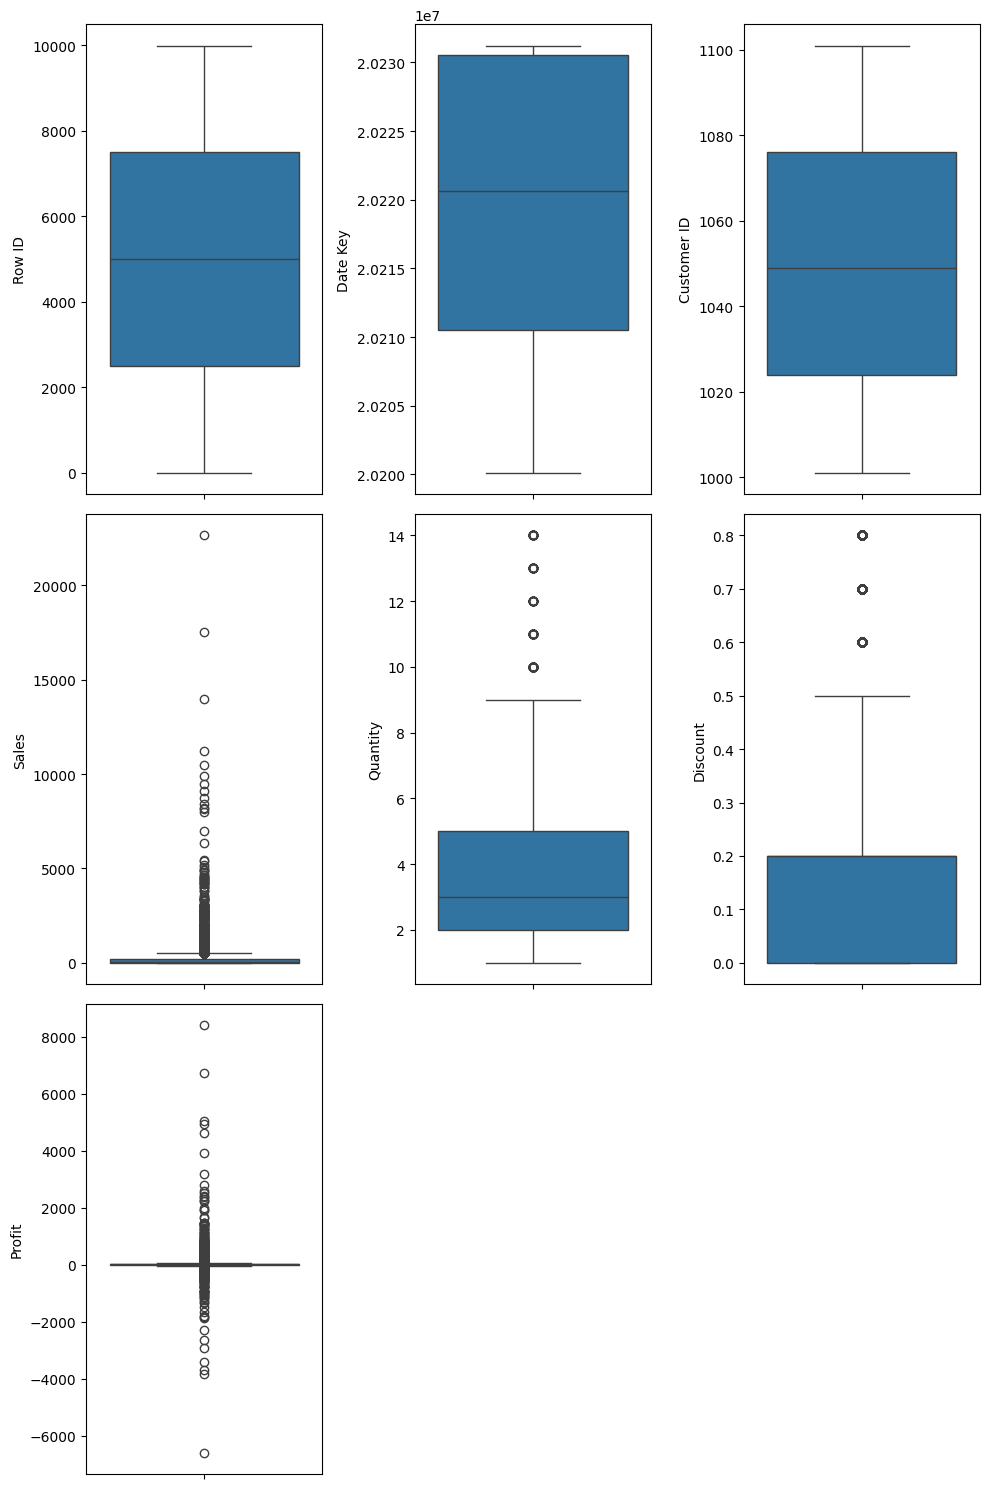

In [15]:
numerik = df.select_dtypes(include = 'number')

plt.figure(figsize = (10,15))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(3,3,posisi)
    sns.boxplot(df[setiap_kolom])
    posisi = posisi + 1

    plt.tight_layout()


In [16]:
df.sort_values (by='Profit', ascending=False).head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6826,6827,APJ-2022-118689,10/3/2022,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.95,5,0.0,8399.9760
8153,8154,AMER-2023-140151,3/24/2023,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.96,4,0.0,6719.9808
4190,4191,APJ-2023-166709,11/18/2023,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.97,3,0.0,5039.9856
9039,9040,AMER-2022-117121,12/18/2022,20221218,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,1093,Energy,SMB,ContactMatcher,VTADHKI6Q5,9892.74,13,0.0,4946.3700
4098,4099,EMEA-2020-116904,9/23/2020,20200923,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,1029,Healthcare,SMB,ContactMatcher,TBTJ3FL8AN,9449.95,5,0.0,4630.4755


In [17]:
df.sort_values (by='Profit', ascending=False).tail(1)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7772,7773,AMER-2022-108196,11/26/2022,20221126,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.978


In [18]:
df.sort_values (by='Sales', ascending=False).head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784
6826,6827,APJ-2022-118689,10/3/2022,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
8153,8154,AMER-2023-140151,3/24/2023,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808
2623,2624,EMEA-2023-127180,10/23/2023,20231023,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,1100,Finance,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888
4190,4191,APJ-2023-166709,11/18/2023,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856


####IQR*(1,5)

In [19]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})


,kolom,jumlah outliers
0,Row ID,0
1,Date Key,0
2,Customer ID,0
3,Sales,1167
4,Quantity,170
5,Discount,856
6,Profit,1881


Terdapat banyak outliers untuk data numerik. Kolom profit, discount, dan sales memiliki rentang yang cukup jauh pada outliersnya sehingga akan di drop beberapa outliersnya.

###Korelasi

<Axes: >

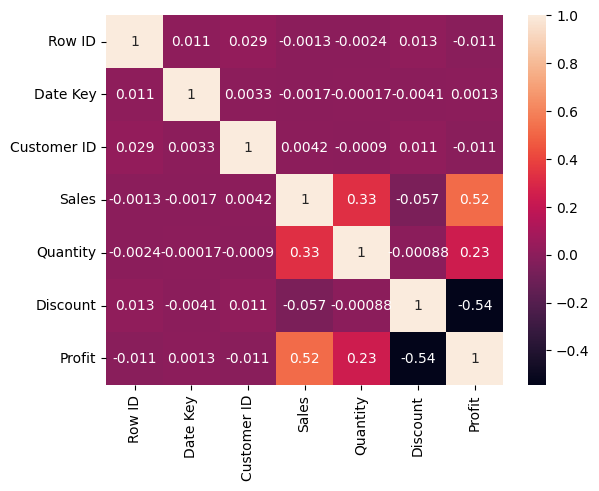

In [20]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

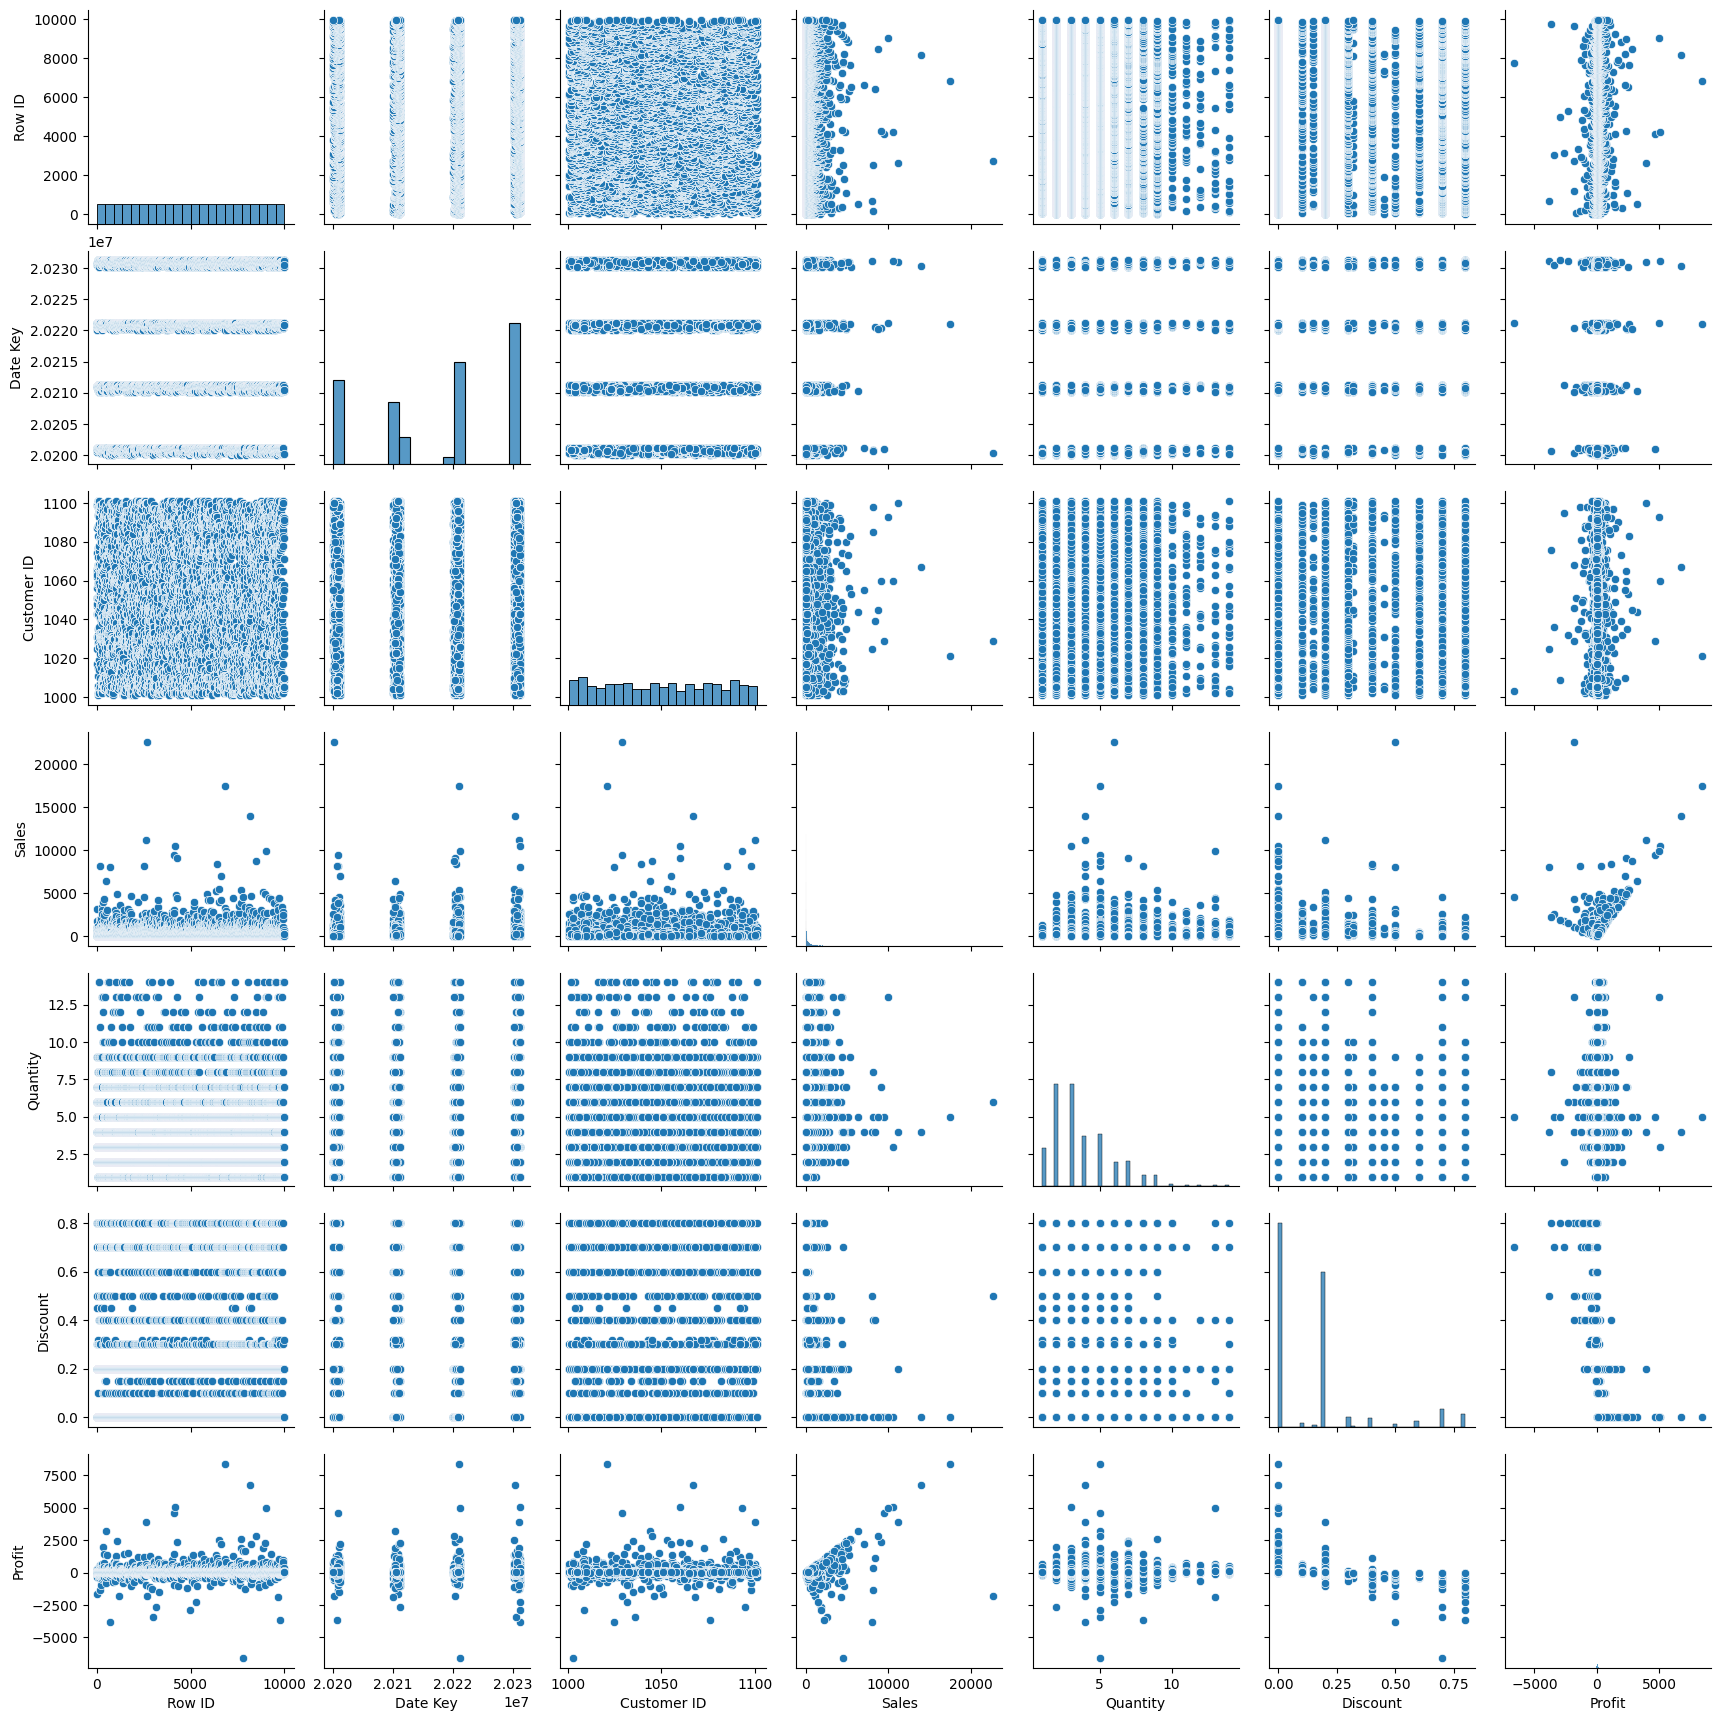

In [21]:
sns.pairplot(df)

Berdasarkan korelasi tersebut, Sales dan Profit memiliki korelasi positif sebesar 0.52, yang cukup tinggi dan menunjukkan bahwa seiring meningkatnya penjualan, profit juga cenderung meningkat. Profit dan Discount memiliki korelasi negatif sebesar -0.54, menunjukkan bahwa diskon yang lebih besar cenderung mengurangi profitabilitas.

##Variable Kategorik

In [22]:
df.describe(include = 'object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [23]:
kategorik = df.select_dtypes(include = 'object')

# menghitung jumlah unique value setiap variabel kategorik
kategorik.nunique()

,0
Order ID,5009
Order Date,1237
Contact Name,793
Country,48
City,262
Region,3
Subregion,12
Customer,99
Industry,10
Segment,3


<Axes: >

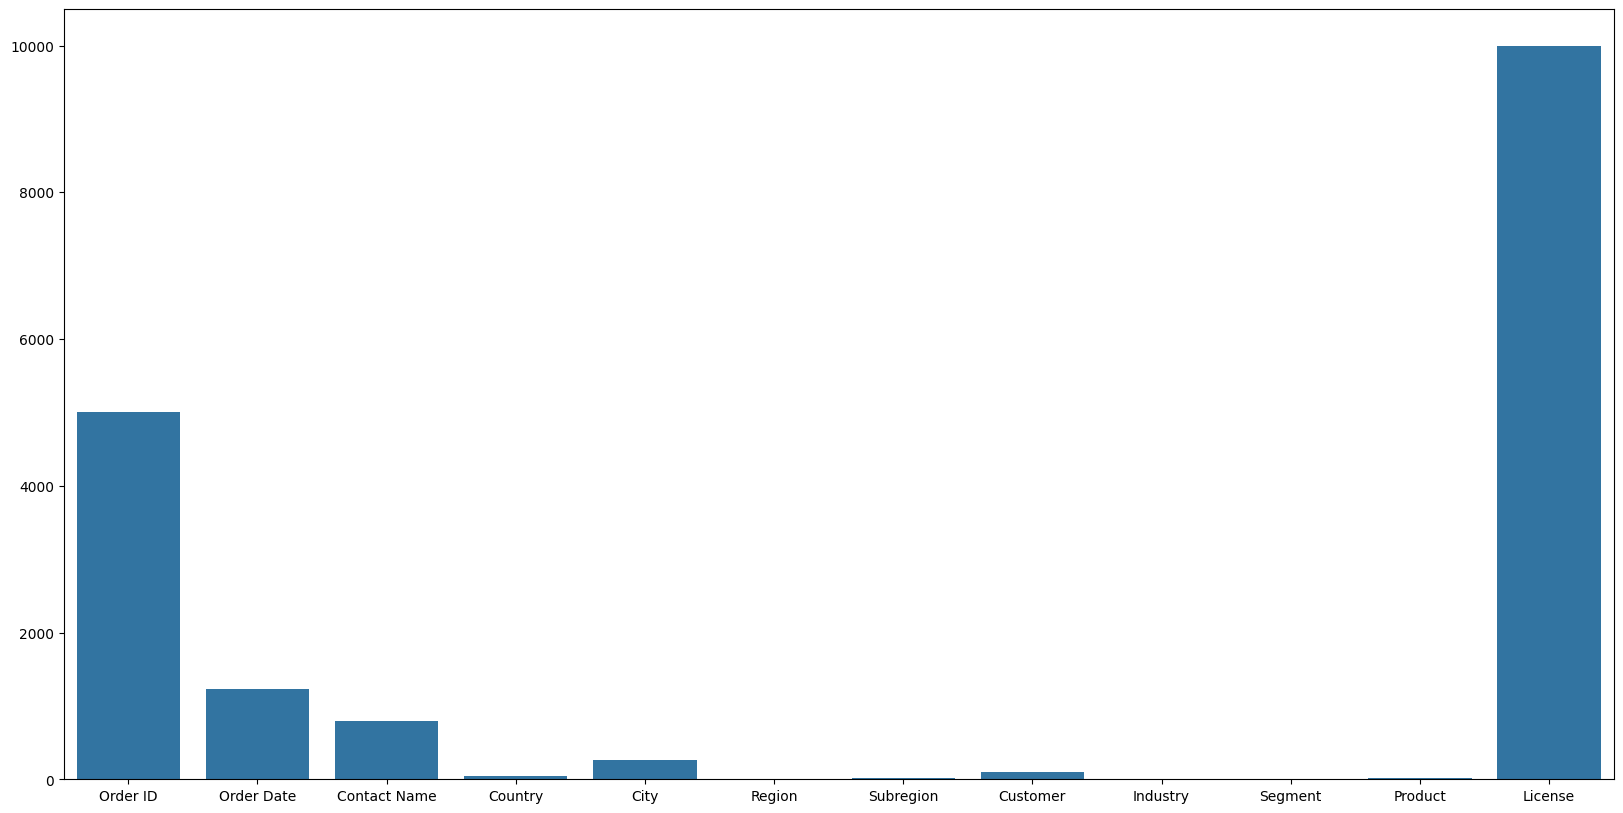

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(kategorik.nunique())


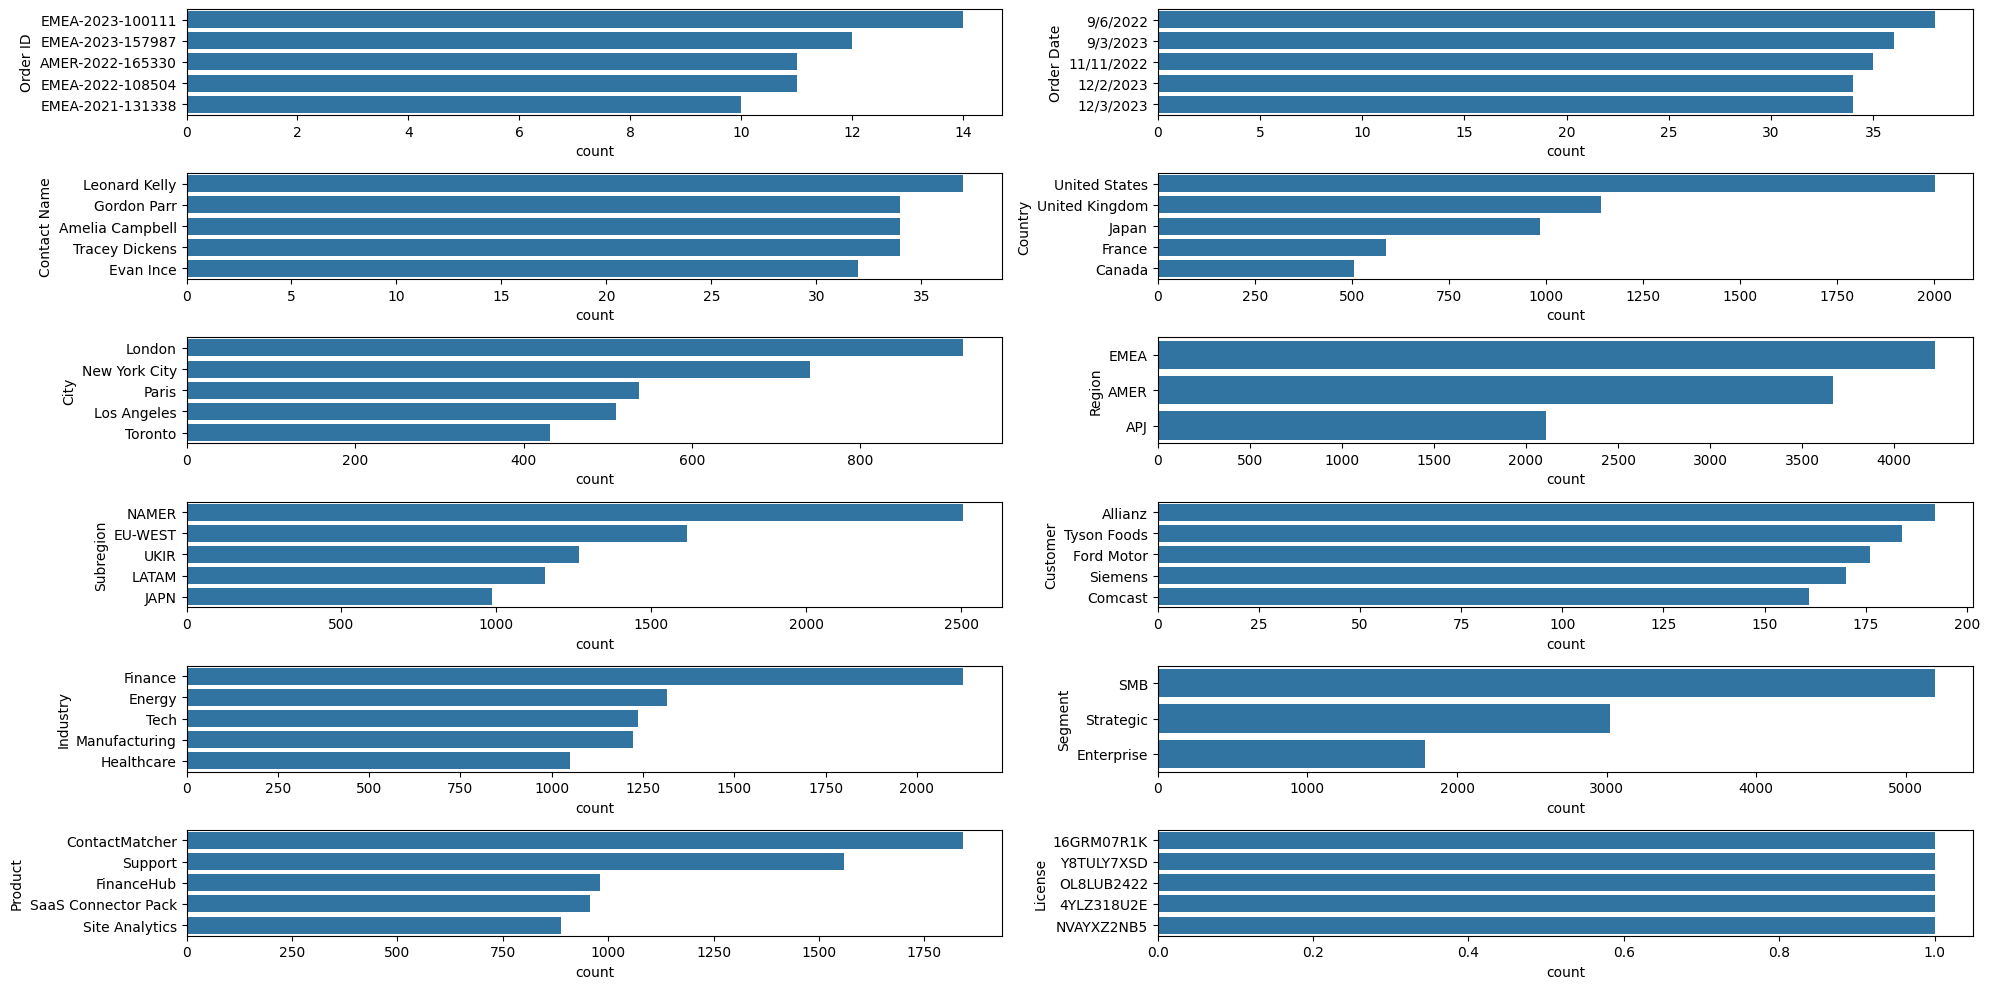

In [25]:
plt.figure(figsize = (20,10))

posisi = 1
for setiap_kolom in kategorik.columns:
    plt.subplot(6,2,posisi)
    sns.barplot(df[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1

    plt.tight_layout()

Pada variable kategorik, terdapat beragam unique values untuk setiap kolomnya.

#Data Cleaning

In [54]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

format untuk order date yang semula object diubah menjadi date time

In [ ]:
#drop data key

df.drop(columns=['Date key'], inplace=True)

In [56]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   flo

kolom Data key di drop karena sama saja dengan order date.

##Handling missing value

Dalam data set tidak terdapat data yang kosong atau missing value, untuk itu pada tahap data cleaning hanya akan dilakukan handling outliers.

##Profit

### Handling Outliers

In [27]:
# Filter untuk Profit dalam rentang -4000 hingga 4000
df2 = df[(df['Profit'] >= -4000) & (df['Profit'] <= 4000)]

# Informasi dataset setelah outliers di-drop
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9988 non-null   int64         
 1   Order ID      9988 non-null   object        
 2   Order Date    9988 non-null   datetime64[ns]
 3   Date Key      9988 non-null   int64         
 4   Contact Name  9988 non-null   object        
 5   Country       9988 non-null   object        
 6   City          9988 non-null   object        
 7   Region        9988 non-null   object        
 8   Subregion     9988 non-null   object        
 9   Customer      9988 non-null   object        
 10  Customer ID   9988 non-null   int64         
 11  Industry      9988 non-null   object        
 12  Segment       9988 non-null   object        
 13  Product       9988 non-null   object        
 14  License       9988 non-null   object        
 15  Sales         9988 non-null   float64      

Pada analisis kali ini, outliers yang didrop pada kolom profit hanyalah untuk data yang memiliki profit lebih tinggi dari 4000 dan profit (kerugian) yang kurang dari -4000.

Perubahan dimensi yang awalnya 9994 menjadi 9988 baris.

<Axes: ylabel='Profit'>

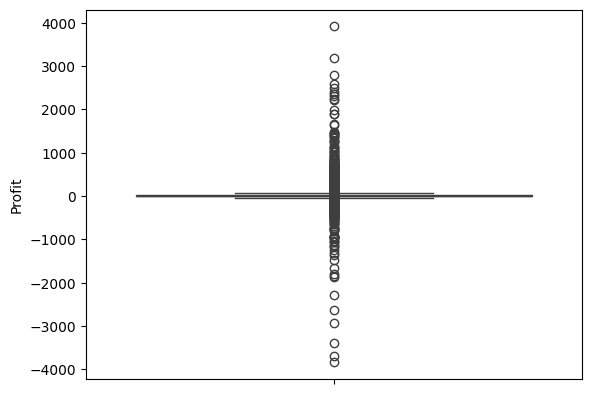

In [28]:
 sns.boxplot(df2['Profit'])

##Sales

###Handling Outliers

In [29]:
# Filter untuk Sales di bawah 10000
df2 = df2[df2['Sales'] <= 10000]

# Informasi dataset setelah outliers di-drop
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9986 non-null   int64         
 1   Order ID      9986 non-null   object        
 2   Order Date    9986 non-null   datetime64[ns]
 3   Date Key      9986 non-null   int64         
 4   Contact Name  9986 non-null   object        
 5   Country       9986 non-null   object        
 6   City          9986 non-null   object        
 7   Region        9986 non-null   object        
 8   Subregion     9986 non-null   object        
 9   Customer      9986 non-null   object        
 10  Customer ID   9986 non-null   int64         
 11  Industry      9986 non-null   object        
 12  Segment       9986 non-null   object        
 13  Product       9986 non-null   object        
 14  License       9986 non-null   object        
 15  Sales         9986 non-null   float64      

Pada analisis kali ini, data difilter yakni dengan menghilangkan sales yang berada diatas 10000.

Perubahan dimensi yang awalnya 9988 menjadi 9986 baris.



<Axes: ylabel='Sales'>

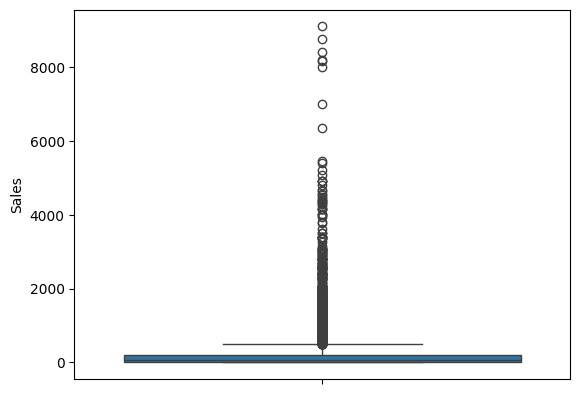

In [30]:
 sns.boxplot(df2['Sales'])

Untuk Discount dan quantity tidak dilakukan penghapusan outliers karena outliers yang ada pada discount dan quantity dirasa masih masuk akal.

#EDA

##Korelasi profit dengan Diskon

<Axes: >

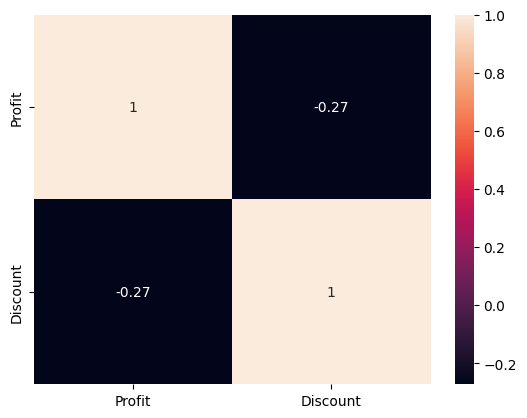

In [31]:
sns.heatmap(df2[['Profit','Discount']].corr(), annot = True)

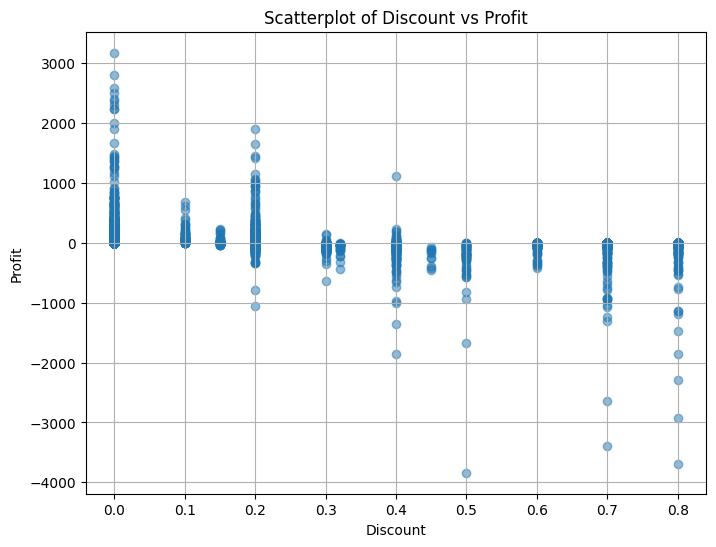

In [32]:
#Scatterplot antara kolom 'Discount' dan 'Profit'
plt.figure(figsize=(8, 6))
plt.scatter(df2['Discount'], df2['Profit'], alpha=0.5)
plt.title('Scatterplot of Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Profit dan diskon memiliki korelasi yang negatif, yang mana ketika diskon meningkat, profit cenderung menurun.

Diskon yang tinggi (diatas 20%) cenderung menurunkan profit, terutama ketika diskon mulai mendekati 50% keatas, terdapat beberapa poin yang menunjukkan profit bernilai negatif atau kerugian.

Pada tingkat diskon yang sama, profit bisa sangat bervariasi, (misalnya, pada diskon 0.2, profit bisa berkisar dari negatif hingga positif yang cukup tinggi). Hal ini menunjukkan bahwa terdapat faktor lain seperti segmen pasar atau jenis produk yang mungkin berperan dalam menentukan profit.


In [33]:
from scipy.stats import mannwhitneyu

#cek dengan uji statistika

H0 = "Tidak terdapat perbedaan yang signifikan antara profitabilitas transaksi dengan dan tanpa diskon"
Ha = "Terdapat perbedaan yang signifikan antara profitabilitas transaksi dengan dan tanpa diskon"
stat, pval = mannwhitneyu(df[df['Discount'] > 0]['Profit'],
                          df[df['Discount'] == 0]['Profit'])
if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: Terdapat perbedaan yang signifikan antara profitabilitas transaksi dengan dan tanpa diskon (pvalue = 0.0)


Berdasarkan uji statistika Mannwhitneyu didapatkan pvalue yang lebih kecil dari 0.05 sehingga H0 ditolak yang berarti Terdapat perbedaan yang signifikan antara profitabilitas transaksi dengan dan tanpa diskon

##Segment pasar

Selanjutnya, mari kita lihat hubungan diskon dengan segment pasar untuk menjawab pertanyaan "Apakah ada segmen pasar tertentu di mana diskon lebih berpengaruh terhadap penurunan profit?"

In [34]:
segmen_distribution = df2['Segment'].value_counts()
pd.DataFrame(segmen_distribution).reset_index()

,Segment,count
0,SMB,5186
1,Strategic,3019
2,Enterprise,1781


Segment pasar terbagi menjadi 3, yakni SMB, Strategic, dan Enterprise.

- SMB (Small and Medium Business): Segmen ini memiliki jumlah terbanyak dalam dataset, yaitu 5.186. Hal ini menunjukkan bahwa SMB adalah segmen dengan jumlah transaksi terbanyak dalam dataset ini.
- Strategic: Segmen ini memiliki jumlah sebesar 3.019, jumlah yang signifikan namun lebih kecil dibandingkan SMB.
- Enterprise: Ini adalah segmen dengan jumlah paling sedikit, yaitu 1.781.

In [35]:
#Rata-rata diskon dan profit per segmen
segmen_analysis = df2.groupby('Segment').agg({
    'Discount': 'mean',
    'Profit': 'mean',
    'Sales': 'mean'
}).reset_index()

pd.DataFrame(segmen_analysis)

,Segment,Discount,Profit,Sales
0,Enterprise,0.146901,32.672526,222.242954
1,SMB,0.158159,23.020126,214.627601
2,Strategic,0.158281,27.684385,228.104146


- Enterprise tampaknya merupakan segmen yang paling menguntungkan, dengan profit rata-rata tertinggi meskipun memberikan diskon yang lebih rendah.
- SMB memiliki profitabilitas yang paling rendah, meskipun memiliki jumlah transaksi terbanyak.
- Strategic berhasil mempertahankan profit yang lebih tinggi dibanding SMB, meskipun memberikan diskon yang lebih besar.

<ipython-input-36-8b5abc1ca51c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segmen_analysis, x='Segment', y='Profit', palette='viridis')


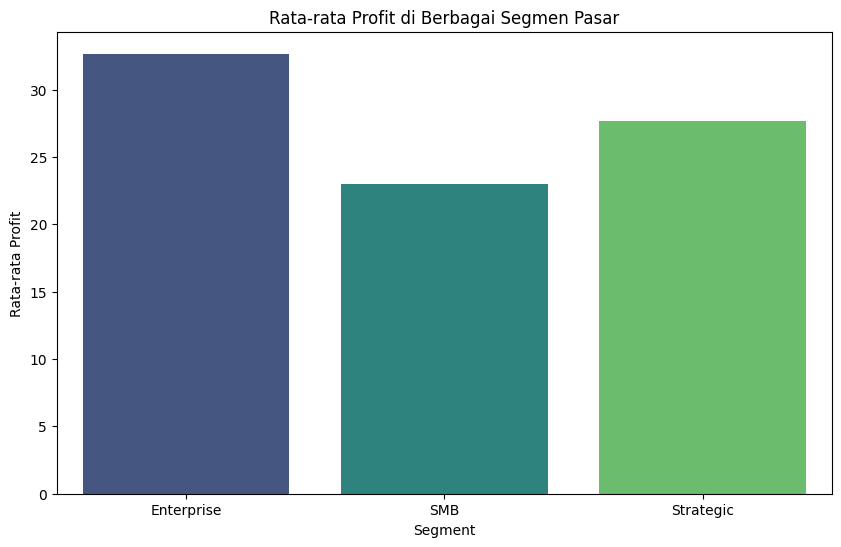

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segmen_analysis, x='Segment', y='Profit', palette='viridis')
plt.title('Rata-rata Profit di Berbagai Segmen Pasar')
plt.xlabel('Segment')
plt.ylabel('Rata-rata Profit')
plt.show()

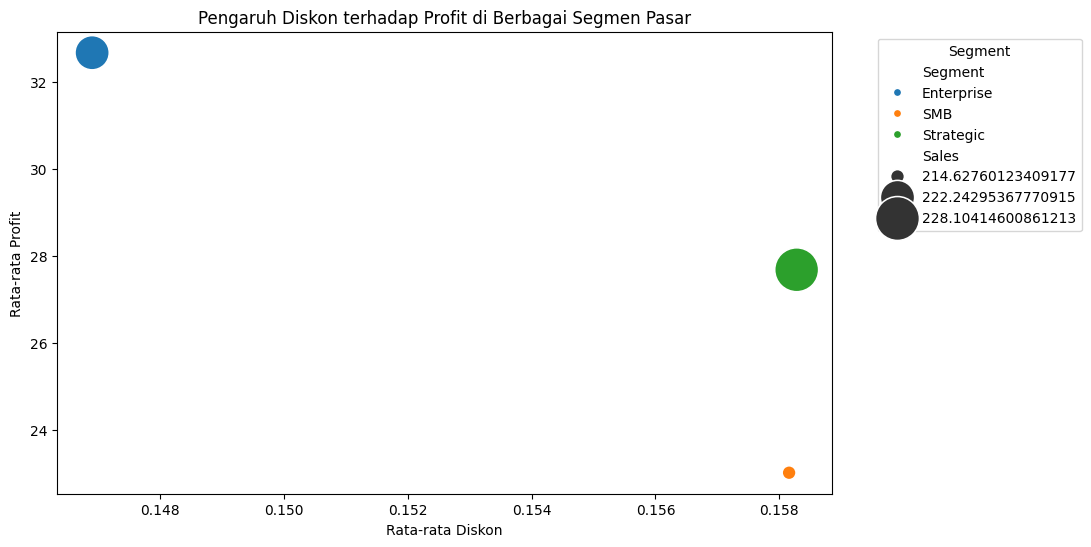

In [37]:
#Scatter plot pengaruh diskon terhadap profit di berbagai segmen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=segmen_analysis, x='Discount', y='Profit', hue='Segment', size='Sales', sizes=(100, 1000))
plt.title('Pengaruh Diskon terhadap Profit di Berbagai Segmen Pasar')
plt.xlabel('Rata-rata Diskon')
plt.ylabel('Rata-rata Profit')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Enterprise: Meskipun diskon yang diberikan kepada segmen Enterprise lebih rendah, segmen ini mampu menghasilkan profit yang lebih tinggi. Hal ini menunjukkan bahwa pelanggan di segmen Enterprise cenderung tidak memperhatikan diskon dan mungkin lebih berfokus pada nilai atau kualitas produk/jasa yang ditawarkan.
- Segmen Strategic memberikan diskon yang lebih besar, namun masih dapat menjaga profit yang cukup tinggi. Diskon di segmen ini mungkin berperan penting dalam mendorong penjualan yang lebih tinggi, yang pada gilirannya membantu mempertahankan profitabilitas.
- Segmen SMB cenderung memberikan diskon tertinggi namun segmen ini memiliki profit rata-rata terendah dan penjualan yang paling rendah.

## Kategori Produk

In [38]:
#Mengelompokkan data berdasarkan kategori produk
grouped_by_category = df2.groupby('Product').agg({
    'Discount': 'mean',
    'Profit': 'mean'
}).reset_index()

pd.DataFrame(grouped_by_category)

,Product,Discount,Profit
0,Alchemy,0.168750,492.779589
1,Big Ol Database,0.300885,104.387728
2,ChatBot Plugin,0.074874,8.200737
3,ContactMatcher,0.353451,1.586650
4,Data Smasher,0.078452,54.111788
5,FinanceHub,0.132518,32.758838
6,Marketing Suite,0.211140,-15.230509
7,Marketing Suite - Gold,0.074704,25.152277
8,OneView,0.166524,38.922758
9,SaaS Connector Pack,0.138349,13.645918


- Produk ContactMatcher memiliki diskon tertinggi tetapi profit yang sangat rendah. Hal ini bisa menunjukkan bahwa diskon yang terlalu besar mungkin merusak profitabilitas produk.
- Produk Alchemy dan Site Analytics menunjukkan bahwa meskipun diskon sedang (16.88% dan 15.46%), mereka masih dapat menghasilkan profit yang cukup tinggi. Hal mungkin menunjukkan bahwa nilai produk atau permintaan yang kuat memungkinkan harga tetap kompetitif tanpa perlu diskon besar.
- Marketing Suite adalah merupakan produk memiliki diskon sebesar 21.11%, tetapi justru mencatatkan profit negatif. untuk itu diperlukan analisis lebih mendalam, Apakah diskon ini menarik pasar yang salah atau tidak.

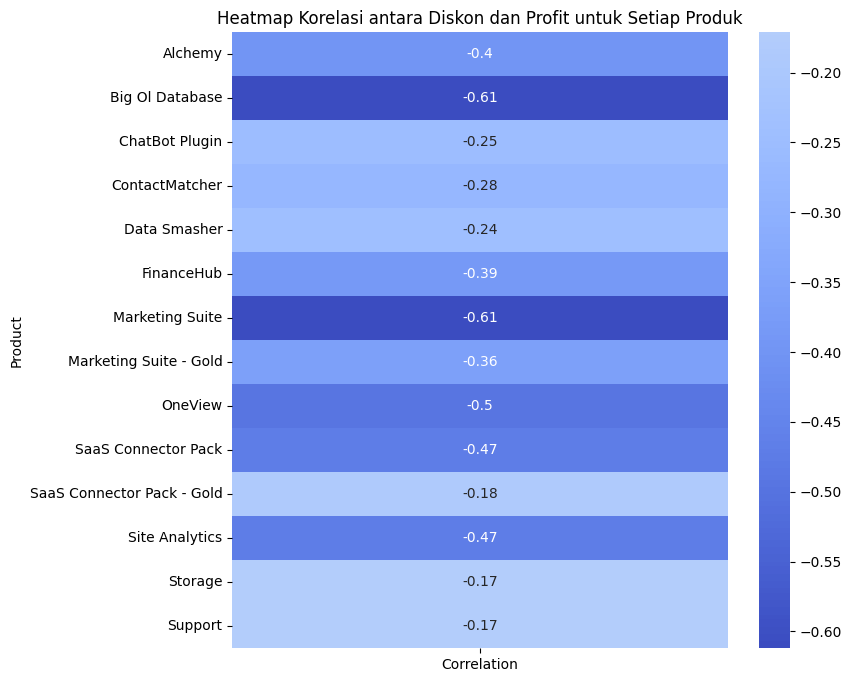

In [39]:
#korelasi antara Diskon dan Profit untuk setiap produk
correlation_per_product = df2.groupby('Product').apply(lambda x: x[['Discount', 'Profit']].corr().iloc[0, 1])
correlation_df = correlation_per_product.reset_index()
correlation_df.columns = ['Product', 'Correlation']
correlation_df.set_index('Product', inplace=True)

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi antara Diskon dan Profit untuk Setiap Produk')
plt.show()

Big Ol Database dan Marketing Suite menunjukkan korelasi negatif yang sangat kuat (-0.61). Setiap peningkatan dalam diskon untuk produk-produk ini berpotensi menurunkan profit secara signifikan.

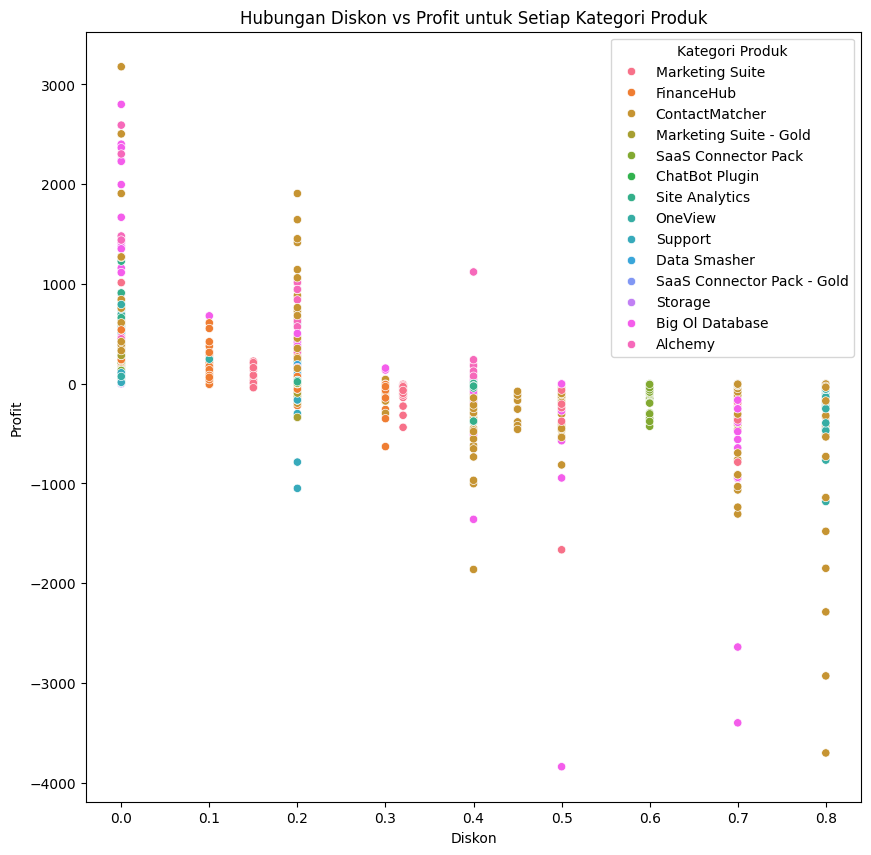

In [40]:
#scatter plot untuk setiap produk
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Discount', y='Profit', hue='Product', data=df2)
plt.title('Hubungan Diskon vs Profit untuk Setiap Kategori Produk')
plt.xlabel('Diskon')
plt.ylabel('Profit')
plt.legend(title='Kategori Produk')
plt.show()

Secara umum, kita dapat melihat bahwa ada kecenderungan penurunan profit seiring dengan meningkatnya diskon, terutama pada beberapa kategori produk tertentu seperti Marketing Suite di mana profit cenderung menurun drastis seiring dengan peningkatan diskon.

## Marketing Suite

In [41]:
# Korelasi untuk produk Marketing Suite di setiap segment
marketing_suite_df = df2[df2['Product'] == 'Marketing Suite']

segment_correlation = marketing_suite_df.groupby('Segment').apply(lambda x: x['Discount'].corr(x['Profit']))
print(segment_correlation)

Segment
Enterprise   -0.684956
SMB          -0.579947
Strategic    -0.679579
dtype: float64


Hasil korelasi negatif antara diskon dan profit di setiap segmen menunjukkan bahwa peningkatan diskon cenderung mengurangi profitabilitas. Ini berlaku di semua segmen (Enterprise, SMB, dan Strategic).

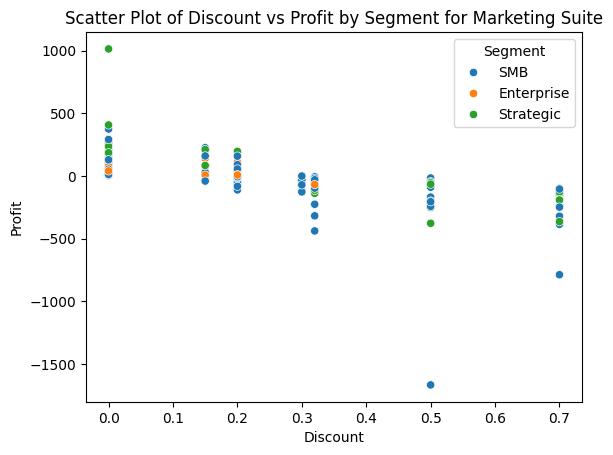

In [42]:
sns.scatterplot(data=marketing_suite_df, x="Discount", y="Profit", hue="Segment")

plt.title('Scatter Plot of Discount vs Profit by Segment for Marketing Suite')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.show()

Segmen SMB menunjukkan distribusi yang lebih tersebar di seluruh rentang diskon, dengan beberapa outlier yang menunjukkan profit negatif yang signifikan pada tingkat diskon yang tinggi. Ketika produk tidak diberikan diskon, tidak ada profit yang bernilai negatif. Profit mulai bernilai negatif ketika pemberian diskon diatas 20%.

#Kesimpulan

Analisis yang telah dilakukan akan menjawab pertanyaan yang telah dirumuskan sebelumnya, yakni:

**1. Apakah ada segmen pasar tertentu di mana diskon lebih berpengaruh terhadap penurunan profit?**

Ya, hasil analisis menunjukkan bahwa segmen SMB (Small and Medium Business) paling terpengaruh oleh diskon. Segmen ini memberikan diskon tertinggi, tetapi juga memiliki profit rata-rata terendah. Diskon di segmen SMB berpengaruh negatif terhadap profitabilitas, sehingga strategi diskon harus dievaluasi ulang untuk segmen ini.

**2. Bagaimana pengaruh diskon terhadap profitabilitas di berbagai kategori produk?**

Secara umum, diskon cenderung berdampak negatif pada profitabilitas. Produk Marketing Suite menunjukkan penurunan profit yang signifikan saat diskon meningkat terutama di segmen SMB. Hal ini menunjukkan bahwa pada kategori produk ini, pemberian diskon tinggi sangat mempengaruhi profitabilitas secara negatif.

**3. Apakah ada tingkat diskon tertentu yang masih dapat diterima tanpa mengorbankan profit secara signifikan?**

Segmen Enterprise mampu mempertahankan profit yang tinggi meskipun memberikan diskon lebih rendah (sekitar 14.7%). Tingkat diskon sekitar 14-15% mungkin masih dapat diterima di segmen Enterprise tanpa mengorbankan profit. Namun, tingkat diskon yang lebih tinggi di segmen SMB tampaknya mengurangi profit secara signifikan, sehingga tingkat diskon yang lebih rendah mungkin lebih optimal untuk segmen ini.

**4. Apa saja faktor lain selain diskon yang mempengaruhi profitabilitas, dan bagaimana mereka berinteraksi dengan diskon?**
Beberapa faktor lain seperti sales dan segmen pasar mempengaruhi profitabilitas. Contohnya, segmen Enterprise dan Strategic memiliki profit yang lebih tinggi karena sales yang juga tinggi meskipun mereka memberikan diskon yang berbeda. Interaksi antara diskon dan penjualan menunjukkan bahwa dalam beberapa kasus, diskon dapat meningkatkan penjualan yang cukup besar untuk menutupi dampak negatif pada margin profit, terutama di segmen Strategic.

#Rekomendasi

- Untuk produk marketing suite di sektor SMB, pertimbangkan untuk membatasi diskon pada tingkat yang masih dapat diterima, yakni tidak melebihi 15% atau bahkan menghapus diskon tanpa mengorbankan profit secara signifikan.
- Fokus pada pengembangan produk tambahan atau fitur eksklusif yang tidak memerlukan diskon besar untuk meningkatkan daya tarik produk.
- Sektor SMB yang mempunyai sales dan profit yang paling rendah, pertimbangkan untuk melatih tim penjualan untuk memahami dampak diskon terhadap profitabilitas dan bagaimana menjual nilai produk daripada mengandalkan diskon besar.
- Segmen Strategic yang memiliki diskon rendah dan profit paling tinggi, pertimbangkan untuk mengalihkan 50% dari diskon yang biasanya diberikan menjadi program loyalitas yang menawarkan nilai lebih tinggi.